<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Augmentation_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

import random

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3885923878287738049
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14357954560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5856530700626874049
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
# загрузка файла с классом для визуализации

from google.colab import files
files.upload()

import sys
import os

py_file_location = "/content/visualization.py"
sys.path.append(os.path.abspath(py_file_location))

from visualization import DataVisualization, ModelVisualization, draw_dataframe

Saving visualization.py to visualization.py


# Данные CIFAR10

## Загрузка данных

In [4]:
!mkdir data
%cd data

/content/data


In [5]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf 'cifar-10-python.tar.gz'
!rm cifar-10-python.tar.gz

--2023-09-23 04:00:02--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  63.8MB/s    in 2.5s    

2023-09-23 04:00:05 (63.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [6]:
%cd cifar-10-batches-py
!ls
%cd ..
%cd ..

/content/data/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch
/content/data
/content


## Формирование данных

In [7]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [8]:
# список названия классов

cifar_label_data = unpickle('data/cifar-10-batches-py/batches.meta')
label_names = cifar_label_data[b'label_names']
for i in range(len(label_names)):
    label_names[i] = label_names[i].decode('ASCII')
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
def unpack_batch(batch_name):
    cifar_data = unpickle('data/cifar-10-batches-py/' + batch_name)
    data = cifar_data[b'data']
    labels = np.array(cifar_data[b'labels'])
    return data, labels

In [10]:
x_train = np.empty((0, 3072))
y_train = np.empty((0, ))
for i in range(5):
    data, labels = unpack_batch('data_batch_' + str(i + 1))
    x_train = np.concatenate((x_train, data), axis=0)
    y_train = np.concatenate((y_train, labels), axis=0)
print(x_train.shape, y_train.shape)

(50000, 3072) (50000,)


In [11]:
x_test, y_test = unpack_batch('test_batch')
print(x_test.shape, y_test.shape)

(10000, 3072) (10000,)


In [12]:
data = DataVisualization(label_names, x_train, y_train, x_test, y_test)

In [13]:
data.shuffle_data()
data.make_val(1000)
data.make_data()

## Описание датасета

In [14]:
data.make_data_stat()

In [15]:
data.size_data_analysis()

,name,size,std
0,train,49000,7.576279
1,val,1000,7.576279
2,test,10000,0.000000


In [16]:
data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,4896,4903,4894,4906,4890,4916,4890,4902,4899,4904
1,val,104,97,106,94,110,84,110,98,101,96
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## Уменьшенный датасет CIFAR10

In [17]:
sample_size = int(x_train.shape[0] * 0.2)

indexes = np.random.choice(x_train.shape[0], sample_size, replace=False)

In [18]:
small_data = DataVisualization(label_names, x_train[indexes], y_train[indexes], x_test, y_test)

In [19]:
small_data.make_val(int(small_data.x_train.shape[0] * 0.02))
small_data.make_data()

In [20]:
small_data.make_data_stat()

In [21]:
small_data.size_data_analysis()

,name,size,std
0,train,9800,25.892084
1,val,200,3.492850
2,test,10000,0.000000


In [22]:
small_data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,992,977,1006,953,974,1014,924,977,975,1008
1,val,21,21,15,24,23,17,16,16,25,22
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


# Нейросесть

In [23]:
model = tf.keras.applications.MobileNet(
    input_shape=(32, 32, 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=10, #cifar-10
    classifier_activation="softmax"
)

In [24]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32)  

# Аугментация

In [26]:
def draw_factor_stat(factors, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.hist(factors, bins=100)
    plt.title(title)
    plt.show()

In [27]:
def image_format(image_data):
    return (np.transpose(image_data.reshape(32, 32, 3, order='F'), axes=[1,0,2]))

In [28]:
def run_model(model_work, epochs_num):
    model_work.model_fit(epochs_num)
    model_work.draw_model_plot()
    loss, accuracy = model_work.draw_model_results()
    return loss, accuracy

In [29]:
def result_model(model_work):
    model_work.make_predictions()
    model_work.draw_confusion_matrix()
    draw_dataframe(model_work.metrics(), 'model_results')

## Сатурация

In [30]:
def augmentation_saturation(data, labels, lower_bound=0, upper_bound=6):
    size = data.shape[0]
    rng = np.random.default_rng()
    factors = rng.normal(loc=(upper_bound + lower_bound) / 2, scale=(upper_bound - lower_bound) / 8, size=size)
    saturated_data = [(tf.image.adjust_saturation(image_format(data[i]), factors[i])).numpy().reshape(3072, ) for i in range(size)]
    return np.array(saturated_data), factors

In [31]:
saturated_data, saturated_factors = augmentation_saturation(small_data.x_train, small_data.y_train)

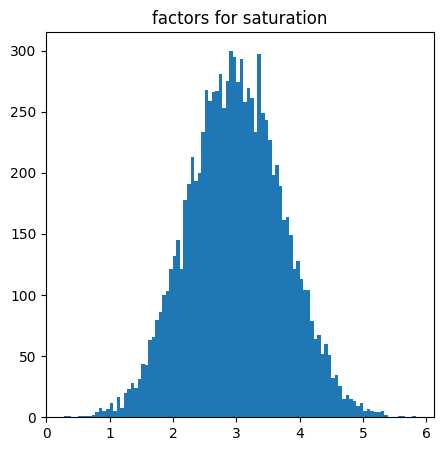

In [32]:
draw_factor_stat(saturated_factors, "factors for saturation")

1
Epoch 1/20
245/245 [==============================] - 26s 17ms/step - loss: 2.3131 - accuracy: 0.1739 - val_loss: 2.3211 - val_accuracy: 0.0962
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 2.0294 - accuracy: 0.2647 - val_loss: 2.3173 - val_accuracy: 0.0962
Epoch 3/20
245/245 [==============================] - 3s 13ms/step - loss: 1.8961 - accuracy: 0.3145 - val_loss: 2.0844 - val_accuracy: 0.2293
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 1.7721 - accuracy: 0.3550 - val_loss: 2.3115 - val_accuracy: 0.2196
Epoch 5/20
245/245 [==============================] - 3s 14ms/step - loss: 1.6880 - accuracy: 0.3982 - val_loss: 2.3370 - val_accuracy: 0.2737
Epoch 6/20
245/245 [==============================] - 3s 14ms/step - loss: 1.6177 - accuracy: 0.4156 - val_loss: 2.1600 - val_accuracy: 0.2934
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 1.5945 - accuracy: 0.4256 - val_loss: 2.2308 - val_accuracy: 0.2

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 4s 14ms/step - loss: 1.1820 - accuracy: 0.5859 - val_loss: 3.3549 - val_accuracy: 0.1865
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 1.3841 - accuracy: 0.5067 - val_loss: 2.2413 - val_accuracy: 0.3097
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 1.1510 - accuracy: 0.5942 - val_loss: 2.0949 - val_accuracy: 0.3334
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 1.0041 - accuracy: 0.6442 - val_loss: 2.1214 - val_accuracy: 0.3349
Epoch 5/20
245/245 [==============================] - 4s 15ms/step - loss: 0.8984 - accuracy: 0.6758 - val_loss: 2.4160 - val_accuracy: 0.3204
Epoch 6/20
245/245 [==============================] - 3s 14ms/step - loss: 0.8556 - accuracy: 0.7011 - val_loss: 2.5105 - val_accuracy: 0.3349
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.8429 - accuracy: 0.7041 - val_loss: 2.4772 - val_accuracy: 0.3176

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 4s 15ms/step - loss: 0.4921 - accuracy: 0.8358 - val_loss: 2.8673 - val_accuracy: 0.3168
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 0.3845 - accuracy: 0.8700 - val_loss: 2.9511 - val_accuracy: 0.3247
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 0.3412 - accuracy: 0.8817 - val_loss: 3.1400 - val_accuracy: 0.3232
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.3090 - accuracy: 0.8951 - val_loss: 3.3231 - val_accuracy: 0.3122
Epoch 5/20
245/245 [==============================] - 3s 14ms/step - loss: 0.2894 - accuracy: 0.9018 - val_loss: 3.2563 - val_accuracy: 0.3240
Epoch 6/20
245/245 [==============================] - 3s 14ms/step - loss: 0.4024 - accuracy: 0.8645 - val_loss: 3.1251 - val_accuracy: 0.3227
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.3217 - accuracy: 0.8917 - val_loss: 3.2414 - val_accuracy: 0.3327

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 4s 15ms/step - loss: 0.2757 - accuracy: 0.9114 - val_loss: 3.1013 - val_accuracy: 0.3298
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 0.2452 - accuracy: 0.9177 - val_loss: 3.3542 - val_accuracy: 0.3283
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 0.2079 - accuracy: 0.9288 - val_loss: 3.3333 - val_accuracy: 0.3298
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1702 - accuracy: 0.9415 - val_loss: 3.7400 - val_accuracy: 0.3153
Epoch 5/20
245/245 [==============================] - 4s 14ms/step - loss: 0.1801 - accuracy: 0.9392 - val_loss: 3.6286 - val_accuracy: 0.3194
Epoch 6/20
245/245 [==============================] - 3s 13ms/step - loss: 0.1928 - accuracy: 0.9341 - val_loss: 3.5220 - val_accuracy: 0.3194
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1622 - accuracy: 0.9446 - val_loss: 3.7083 - val_accuracy: 0.3199

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


5
Epoch 1/20
245/245 [==============================] - 4s 15ms/step - loss: 0.2228 - accuracy: 0.9283 - val_loss: 3.2961 - val_accuracy: 0.3378
Epoch 2/20
245/245 [==============================] - 4s 14ms/step - loss: 0.2346 - accuracy: 0.9235 - val_loss: 3.2996 - val_accuracy: 0.3293
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 0.2318 - accuracy: 0.9224 - val_loss: 3.3885 - val_accuracy: 0.3403
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1223 - accuracy: 0.9611 - val_loss: 3.6253 - val_accuracy: 0.3352
Epoch 5/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1189 - accuracy: 0.9592 - val_loss: 3.7453 - val_accuracy: 0.3495
Epoch 6/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1106 - accuracy: 0.9627 - val_loss: 3.8555 - val_accuracy: 0.3321
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1283 - accuracy: 0.9585 - val_loss: 3.9684 - val_accuracy: 0.33

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 4s 15ms/step - loss: 0.2685 - accuracy: 0.9149 - val_loss: 3.3187 - val_accuracy: 0.3301
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1248 - accuracy: 0.9605 - val_loss: 3.4937 - val_accuracy: 0.3444
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0863 - accuracy: 0.9715 - val_loss: 3.9079 - val_accuracy: 0.3393
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0860 - accuracy: 0.9706 - val_loss: 4.0357 - val_accuracy: 0.3520
Epoch 5/20
245/245 [==============================] - 4s 14ms/step - loss: 0.0862 - accuracy: 0.9716 - val_loss: 4.0682 - val_accuracy: 0.3385
Epoch 6/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1111 - accuracy: 0.9626 - val_loss: 3.6654 - val_accuracy: 0.3477
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0862 - accuracy: 0.9710 - val_loss: 4.0205 - val_accuracy: 0.3329

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1411 - accuracy: 0.9543 - val_loss: 3.6591 - val_accuracy: 0.3337
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0920 - accuracy: 0.9700 - val_loss: 3.9548 - val_accuracy: 0.3411
Epoch 3/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0960 - accuracy: 0.9673 - val_loss: 3.8922 - val_accuracy: 0.3337
Epoch 4/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0749 - accuracy: 0.9756 - val_loss: 3.9546 - val_accuracy: 0.3408
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0864 - accuracy: 0.9723 - val_loss: 4.0687 - val_accuracy: 0.3429
Epoch 6/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0804 - accuracy: 0.9735 - val_loss: 3.9510 - val_accuracy: 0.3388
Epoch 7/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0786 - accuracy: 0.9729 - val_loss: 4.0309 - val_accuracy: 0.3370

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 3s 14ms/step - loss: 0.1194 - accuracy: 0.9618 - val_loss: 3.5627 - val_accuracy: 0.3459
Epoch 2/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0663 - accuracy: 0.9783 - val_loss: 3.9507 - val_accuracy: 0.3515
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0705 - accuracy: 0.9767 - val_loss: 4.0055 - val_accuracy: 0.3436
Epoch 4/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0697 - accuracy: 0.9765 - val_loss: 3.9775 - val_accuracy: 0.3464
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0650 - accuracy: 0.9790 - val_loss: 4.0615 - val_accuracy: 0.3434
Epoch 6/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0658 - accuracy: 0.9783 - val_loss: 4.2356 - val_accuracy: 0.3431
Epoch 7/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0785 - accuracy: 0.9745 - val_loss: 3.9704 - val_accuracy: 0.3393

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 4s 15ms/step - loss: 0.1111 - accuracy: 0.9652 - val_loss: 3.5814 - val_accuracy: 0.3630
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0602 - accuracy: 0.9807 - val_loss: 3.8894 - val_accuracy: 0.3526
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0627 - accuracy: 0.9799 - val_loss: 3.8604 - val_accuracy: 0.3569
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0573 - accuracy: 0.9803 - val_loss: 3.9920 - val_accuracy: 0.3543
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0704 - accuracy: 0.9767 - val_loss: 4.0651 - val_accuracy: 0.3457
Epoch 6/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 4.0441 - val_accuracy: 0.3574
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0594 - accuracy: 0.9809 - val_loss: 3.9501 - val_accuracy: 0.3569

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


Epoch 1/20
245/245 [==============================] - 4s 14ms/step - loss: 0.0916 - accuracy: 0.9712 - val_loss: 3.7211 - val_accuracy: 0.3625
Epoch 2/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0595 - accuracy: 0.9806 - val_loss: 3.8538 - val_accuracy: 0.3661
Epoch 3/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0567 - accuracy: 0.9808 - val_loss: 4.0785 - val_accuracy: 0.3617
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0484 - accuracy: 0.9844 - val_loss: 4.1330 - val_accuracy: 0.3569
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0450 - accuracy: 0.9840 - val_loss: 4.1319 - val_accuracy: 0.3503
Epoch 6/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 4.0947 - val_accuracy: 0.3485
Epoch 7/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0544 - accuracy: 0.9823 - val_loss: 3.9691 - val_accuracy: 0.3515

<ipython-input-33-cb9ebcc7874d>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 3, 3*upper_bound - 2)


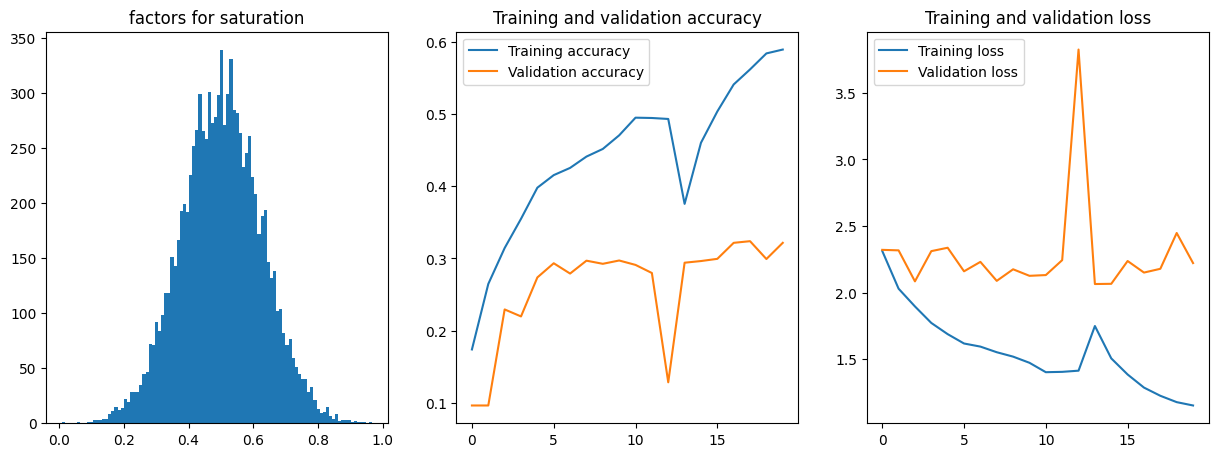

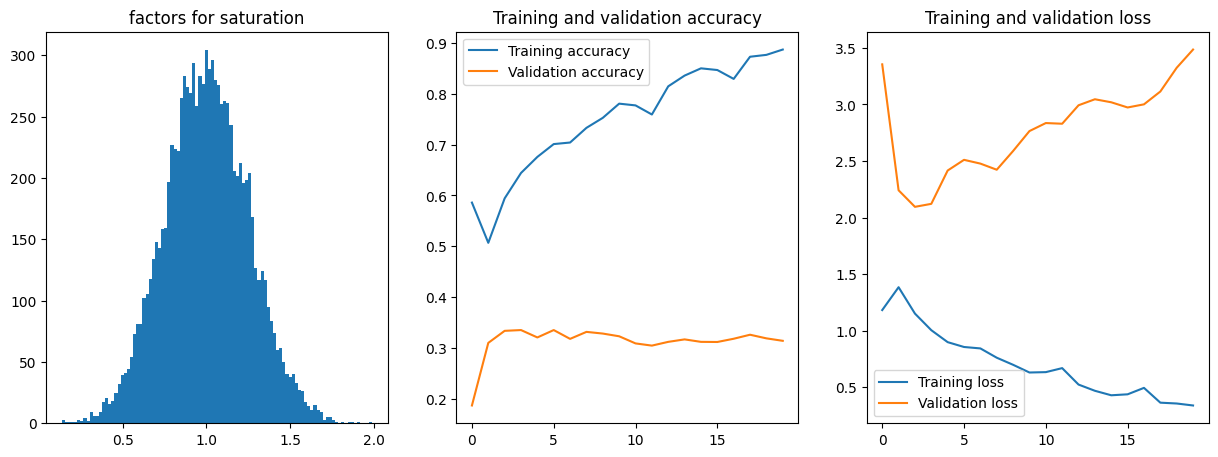

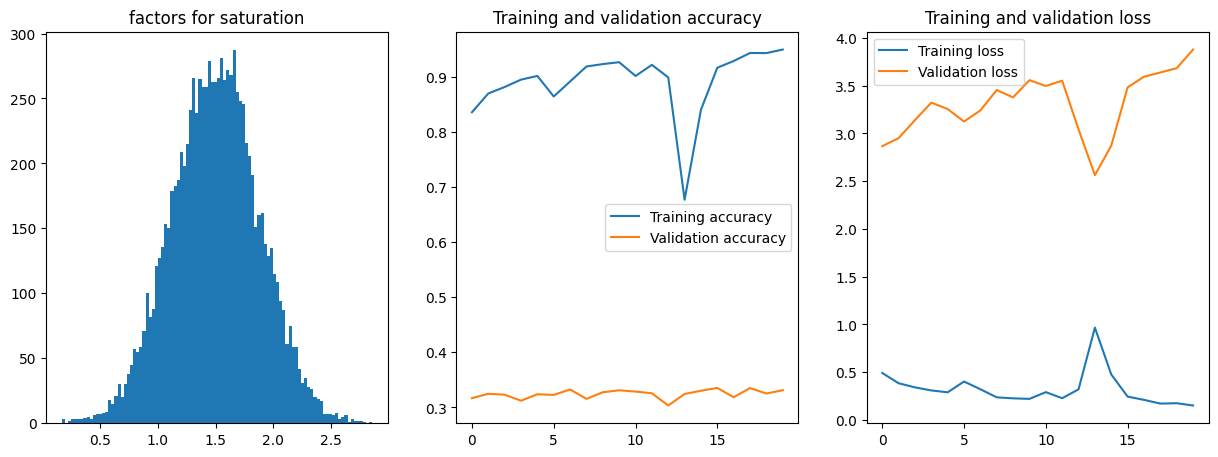

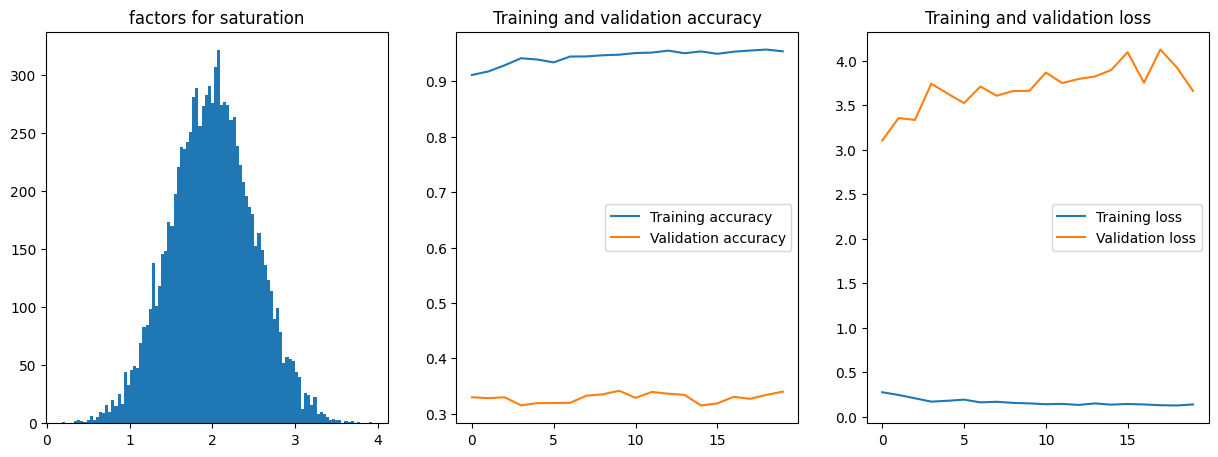

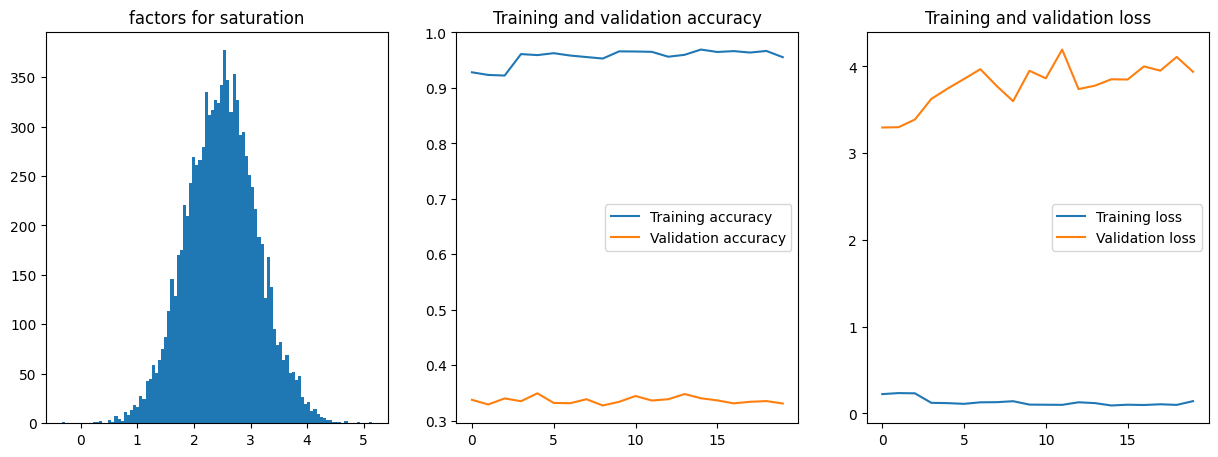

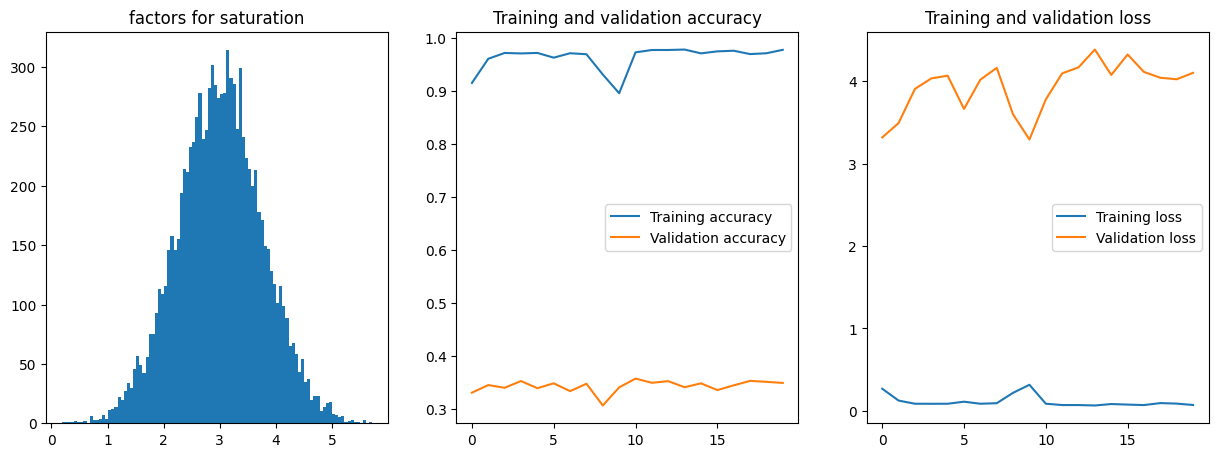

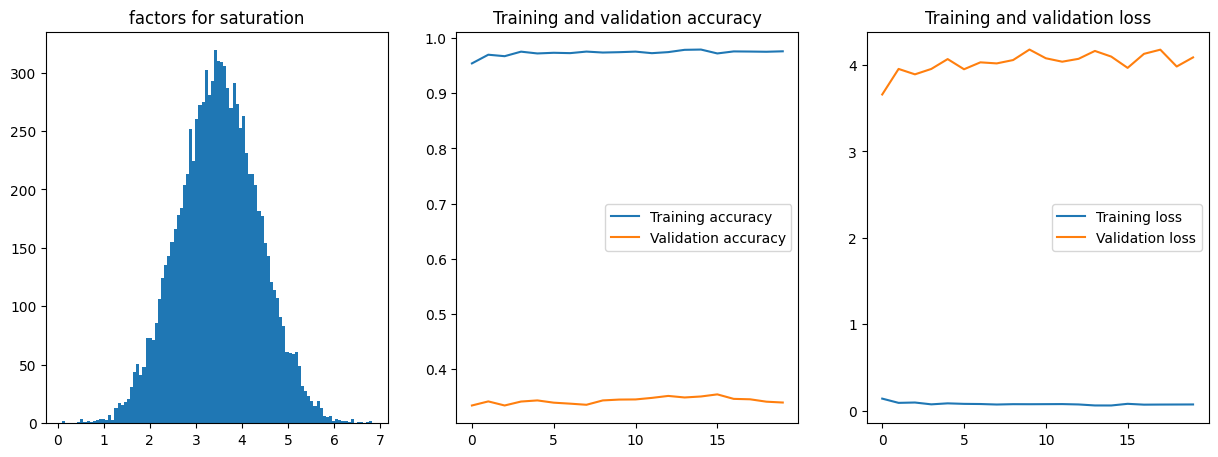

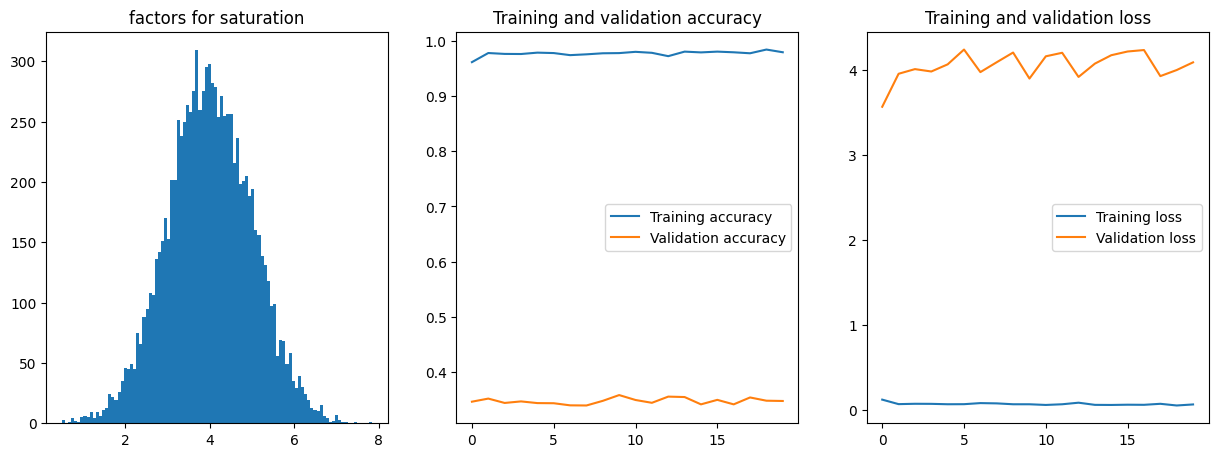

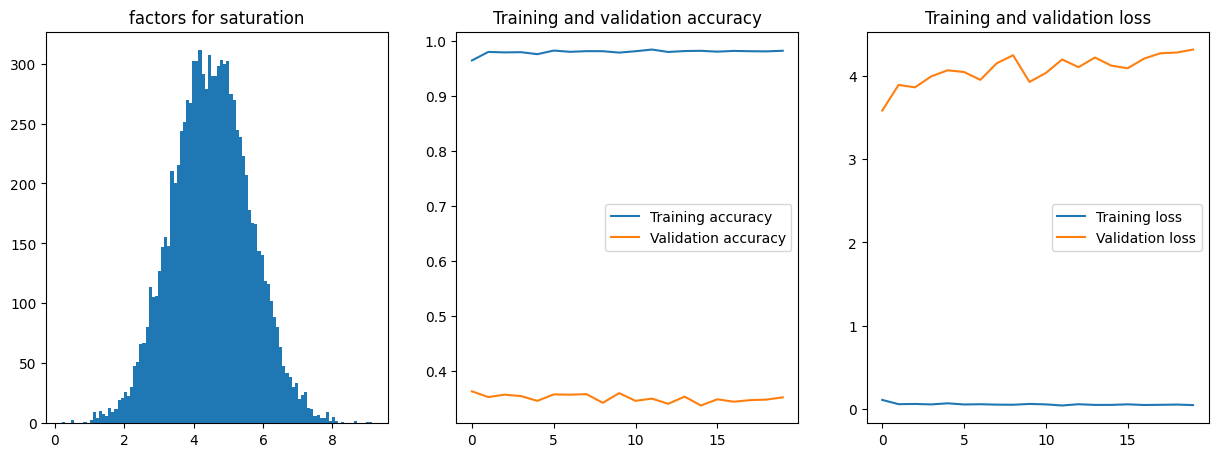

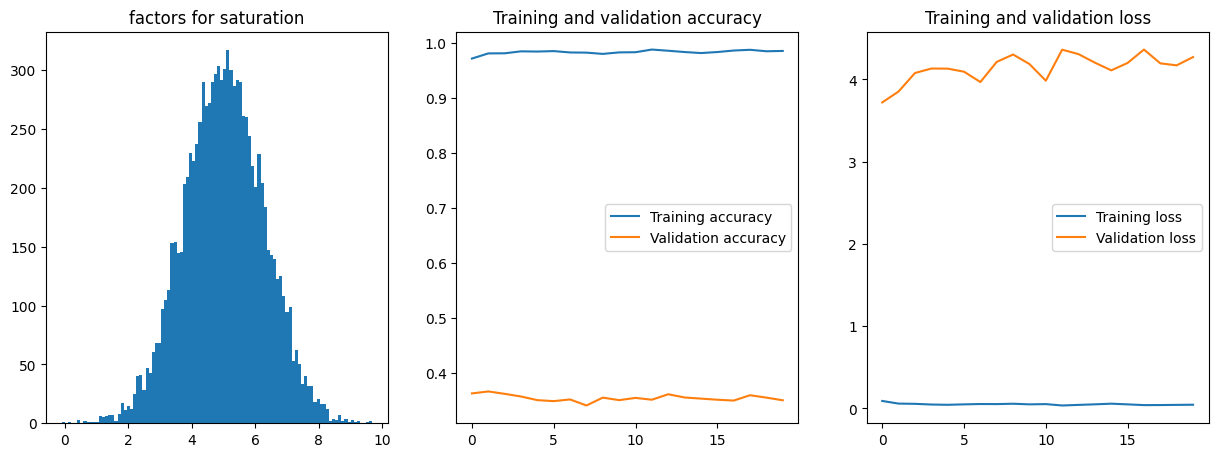

In [33]:
saturation_results = pd.DataFrame(columns=['upper_bound', 'loss', 'accuracy'])
lower_bound = 0
epochs_num = 20
epoch_range = range(epochs_num)
for upper_bound in np.arange(1, 11):
    print(upper_bound)
    new_saturated_data, new_saturated_factors = augmentation_saturation(small_data.x_train, small_data.y_train, lower_bound, upper_bound)
    #draw_factor_stat(saturated_factors, "factors for saturation")
    new_saturated_data = DataVisualization(label_names, new_saturated_data, small_data.y_train, np.zeros((0, 3072)), np.zeros((0, )))
    new_data = small_data + new_saturated_data
    new_data.make_val()
    new_data.make_data()
    model_work = ModelVisualization(model, new_data)
    model_work.model_fit(epochs_num)
    # model_work.draw_model_plot()
    loss, accuracy = model_work.model.evaluate(model_work.data.x_image_test, model_work.data.y_vect_test)

    history = model_work.get_history()

    fig, ax = plt.subplots(figsize=(15, 60))
    plt.subplot(10, 3, 3*upper_bound - 2)
    plt.hist(new_saturated_factors, bins=100)
    plt.title('factors for saturation')

    plt.subplot(10, 3, 3*upper_bound - 1)
    plt.plot(epoch_range, history['accuracy'], label='Training accuracy')
    plt.plot(epoch_range, history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(10, 3, 3*upper_bound)
    plt.plot(epoch_range, history['loss'], label='Training loss')
    plt.plot(epoch_range, history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    new_row = {'upper_bound':upper_bound, 'loss':loss, 'accuracy':accuracy}
    # saturation_results.append(new_row, ignore_index=True)
    saturation_results = pd.concat([saturation_results, pd.DataFrame.from_records([new_row])], ignore_index=True)
plt.show()

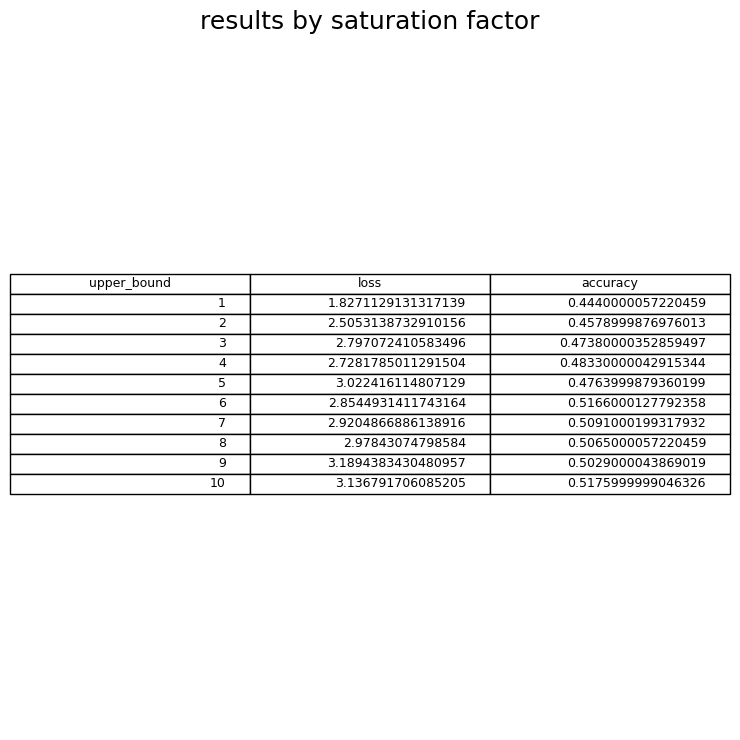

In [34]:
draw_dataframe(saturation_results, 'results by saturation factor')

In [35]:
def normalize_list(l):
    return (l - np.min(l)) / (np.max(l) - np.min(l))

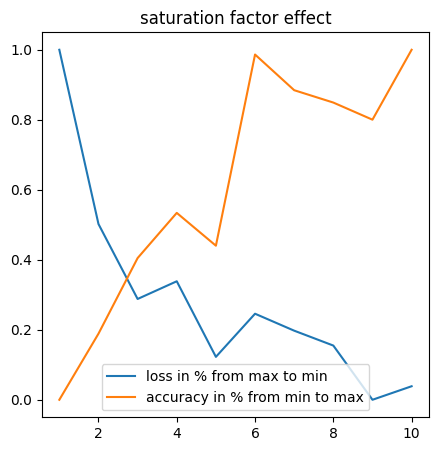

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
loss = saturation_results['loss'].to_numpy()
loss = 1 - normalize_list(loss)
accuracy = saturation_results['accuracy'].to_numpy()
accuracy = normalize_list(accuracy)
plt.plot(range(1, 11), loss, label='loss in % from max to min')
plt.plot(range(1, 11), accuracy, label='accuracy in % from min to max')
plt.title("saturation factor effect")
plt.legend()
plt.show()

Таким образом, для сатурации оптимальный фактор равняется 6

## Яркость

In [33]:
def augmentation_brightness(data, labels, distribution='standard'):
    size = data.shape[0]
    rng = np.random.default_rng()
    if distribution == 'normal':
        factors = rng.normal(0, 0.25, size=size)
    if distribution == 'beta':
        factors = rng.beta(3, 3, size=size) * -2 + 1
    if distribution == 'uniform':
        factors = rng.uniform(-1, 1, size=size)
    if distribution == 'standard':
        factors = rng.standard_normal(size=size) / 4
    brighted_data = [(tf.image.adjust_brightness(image_format(data[i]), factors[i])).numpy().reshape(3072, ) for i in range(size)]
    return np.array(brighted_data), factors

In [35]:
brighted_data, brighted_factors = augmentation_brightness(small_data.x_train, small_data.y_train)

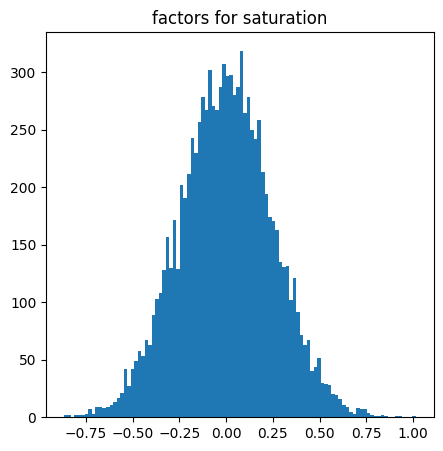

In [36]:
draw_factor_stat(brighted_factors, "factors for saturation")

normal
Epoch 1/20
245/245 [==============================] - 3s 14ms/step - loss: 0.2863 - accuracy: 0.9126 - val_loss: 2.7879 - val_accuracy: 0.3556
Epoch 2/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0938 - accuracy: 0.9703 - val_loss: 3.4032 - val_accuracy: 0.3582
Epoch 3/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0549 - accuracy: 0.9821 - val_loss: 3.7670 - val_accuracy: 0.3668
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0588 - accuracy: 0.9808 - val_loss: 3.8689 - val_accuracy: 0.3533
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0728 - accuracy: 0.9746 - val_loss: 3.7427 - val_accuracy: 0.3732
Epoch 6/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0546 - accuracy: 0.9807 - val_loss: 4.0210 - val_accuracy: 0.3592
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0502 - accuracy: 0.9832 - val_loss: 4.1906 - val_accuracy:

<ipython-input-40-6ada87cb1408>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list_types), 3, 3*type_id + 1)


Epoch 1/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0485 - accuracy: 0.9835 - val_loss: 4.2986 - val_accuracy: 0.3487
Epoch 2/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 4.1016 - val_accuracy: 0.3602
Epoch 3/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 4.1456 - val_accuracy: 0.3681
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0500 - accuracy: 0.9841 - val_loss: 4.0914 - val_accuracy: 0.3566
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 4.0985 - val_accuracy: 0.3587
Epoch 6/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0385 - accuracy: 0.9873 - val_loss: 4.2989 - val_accuracy: 0.3559
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0459 - accuracy: 0.9846 - val_loss: 4.1304 - val_accuracy: 0.3628

<ipython-input-40-6ada87cb1408>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list_types), 3, 3*type_id + 1)


Epoch 1/20
245/245 [==============================] - 4s 15ms/step - loss: 0.0444 - accuracy: 0.9849 - val_loss: 4.1922 - val_accuracy: 0.3610
Epoch 2/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 4.1599 - val_accuracy: 0.3592
Epoch 3/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0347 - accuracy: 0.9878 - val_loss: 4.2305 - val_accuracy: 0.3579
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0389 - accuracy: 0.9886 - val_loss: 4.2451 - val_accuracy: 0.3656
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0370 - accuracy: 0.9876 - val_loss: 4.1669 - val_accuracy: 0.3589
Epoch 6/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0338 - accuracy: 0.9878 - val_loss: 4.2046 - val_accuracy: 0.3607
Epoch 7/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 4.2705 - val_accuracy: 0.3658

<ipython-input-40-6ada87cb1408>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list_types), 3, 3*type_id + 1)


Epoch 1/20
245/245 [==============================] - 4s 15ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 4.1486 - val_accuracy: 0.3607
Epoch 2/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 4.1162 - val_accuracy: 0.3661
Epoch 3/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0257 - accuracy: 0.9907 - val_loss: 4.2366 - val_accuracy: 0.3676
Epoch 4/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 4.4979 - val_accuracy: 0.3551
Epoch 5/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0346 - accuracy: 0.9886 - val_loss: 4.2926 - val_accuracy: 0.3523
Epoch 6/20
245/245 [==============================] - 3s 14ms/step - loss: 0.0352 - accuracy: 0.9877 - val_loss: 4.1052 - val_accuracy: 0.3607
Epoch 7/20
245/245 [==============================] - 3s 13ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 4.1104 - val_accuracy: 0.3699

<ipython-input-40-6ada87cb1408>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(list_types), 3, 3*type_id + 1)


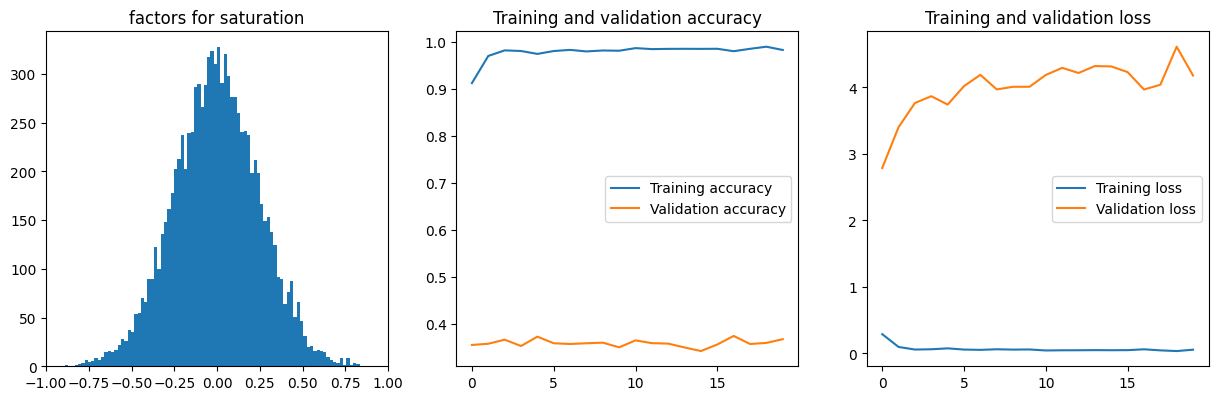

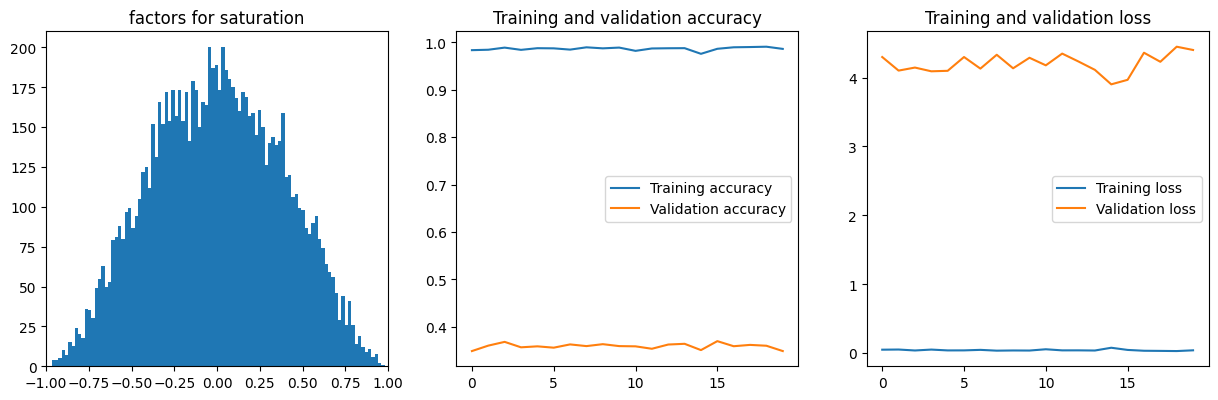

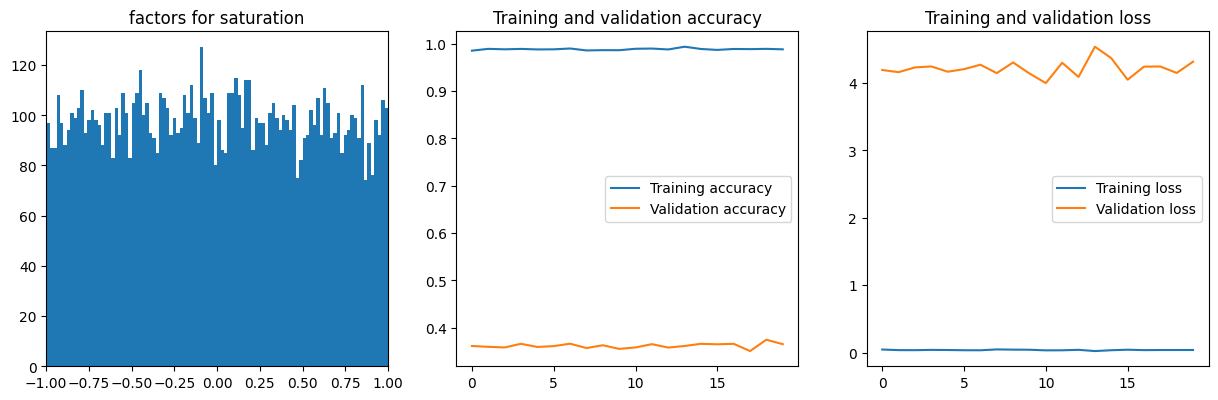

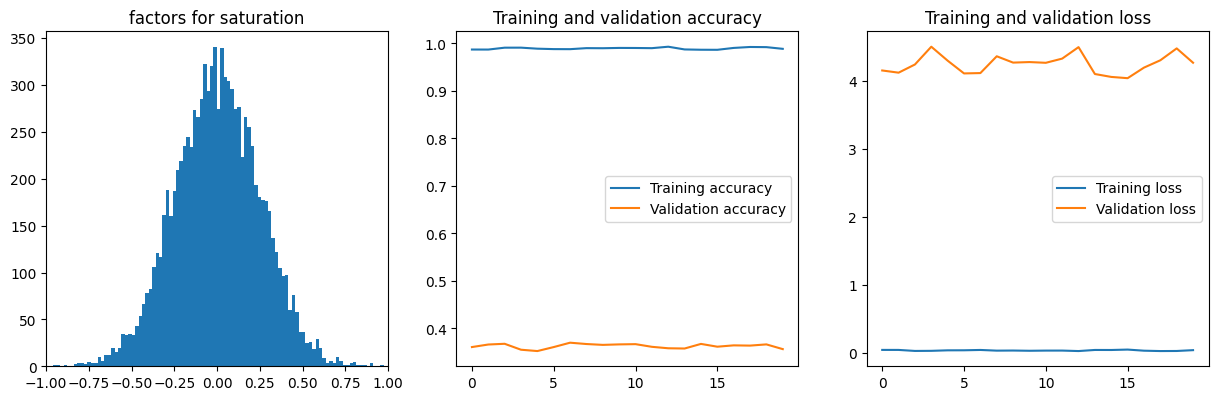

In [40]:
brighted_results = pd.DataFrame(columns=['distribution', 'loss', 'accuracy'])
epochs_num = 20
epoch_range = range(epochs_num)
list_types = ['normal', 'beta', 'uniform', 'standard']
for type_id in range(len(list_types)):
    distribution = list_types[type_id]
    print(distribution)
    new_brighted_data, new_brighted_factors = augmentation_brightness(small_data.x_train, small_data.y_train, distribution)
    #draw_factor_stat(saturated_factors, "factors for saturation")
    new_brighted_data = DataVisualization(label_names, new_brighted_data, small_data.y_train, np.zeros((0, 3072)), np.zeros((0, )))
    new_data = small_data + new_brighted_data
    new_data.make_val()
    new_data.make_data()
    model_work = ModelVisualization(model, new_data)
    model_work.model_fit(epochs_num)
    # model_work.draw_model_plot()
    loss, accuracy = model_work.model.evaluate(model_work.data.x_image_test, model_work.data.y_vect_test)

    history = model_work.get_history()

    fig, ax = plt.subplots(figsize=(15, 20))
    plt.subplot(len(list_types), 3, 3*type_id + 1)
    plt.hist(new_brighted_factors, bins=100)
    plt.xlim(-1, 1)
    plt.title('factors for saturation')

    plt.subplot(len(list_types), 3, 3*type_id + 2)
    plt.plot(epoch_range, history['accuracy'], label='Training accuracy')
    plt.plot(epoch_range, history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(len(list_types), 3, 3*type_id + 3)
    plt.plot(epoch_range, history['loss'], label='Training loss')
    plt.plot(epoch_range, history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    new_row = {'distribution':distribution, 'loss':loss, 'accuracy':accuracy}
    # saturation_results.append(new_row, ignore_index=True)
    brighted_results = pd.concat([brighted_results, pd.DataFrame.from_records([new_row])], ignore_index=True)
plt.show()

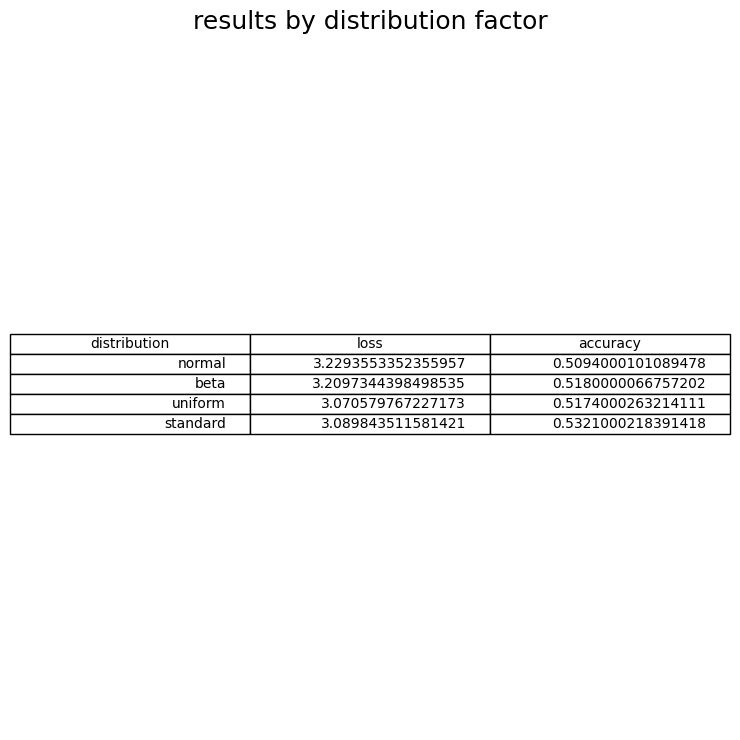

In [41]:
draw_dataframe(brighted_results, 'results by distribution factor')

Таким образом, оптимальное распределение факторов -- нормальное.

# Датасет

In [39]:
augmented_data = DataVisualization(label_names,
                                   np.concatenate((small_data.x_train, saturated_data, brighted_data), axis=0),
                                   np.concatenate((small_data.y_train, small_data.y_train, small_data.y_train), axis=0),
                                   small_data.x_test, small_data.y_test)

In [40]:
augmented_data.make_val()
augmented_data.make_data()

In [41]:
augmented_data.make_data_stat()

In [42]:
augmented_data.size_data_analysis()

,name,size,std
0,train,23520,67.068622
1,val,5880,17.441330
2,test,10000,0.000000


In [43]:
augmented_data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,2390,2341,2415,2285,2358,2457,2214,2329,2321,2410
1,val,586,590,603,574,564,585,558,602,604,614
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


# Проверка эффективности

## CIFAR10

In [47]:
model_work = ModelVisualization(model, data)

Epoch 1/50
766/766 [==============================] - 13s 14ms/step - loss: 1.1282 - accuracy: 0.6347 - val_loss: 1.0440 - val_accuracy: 0.6430
Epoch 2/50
766/766 [==============================] - 11s 14ms/step - loss: 0.8712 - accuracy: 0.7122 - val_loss: 1.0257 - val_accuracy: 0.6590
Epoch 3/50
766/766 [==============================] - 10s 14ms/step - loss: 0.7225 - accuracy: 0.7618 - val_loss: 1.0002 - val_accuracy: 0.6750
Epoch 4/50
766/766 [==============================] - 10s 14ms/step - loss: 0.5836 - accuracy: 0.8077 - val_loss: 1.0663 - val_accuracy: 0.6450
Epoch 5/50
766/766 [==============================] - 10s 14ms/step - loss: 0.4788 - accuracy: 0.8422 - val_loss: 1.1385 - val_accuracy: 0.6640
Epoch 6/50
766/766 [==============================] - 10s 13ms/step - loss: 0.3817 - accuracy: 0.8732 - val_loss: 1.2025 - val_accuracy: 0.6470
Epoch 7/50
766/766 [==============================] - 10s 14ms/step - loss: 0.3096 - accuracy: 0.8969 - val_loss: 1.3687 - val_accuracy:

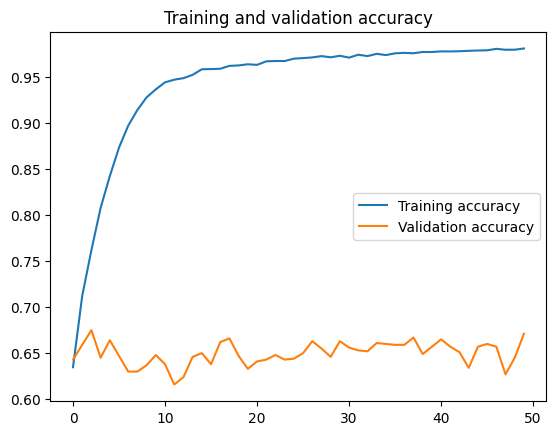

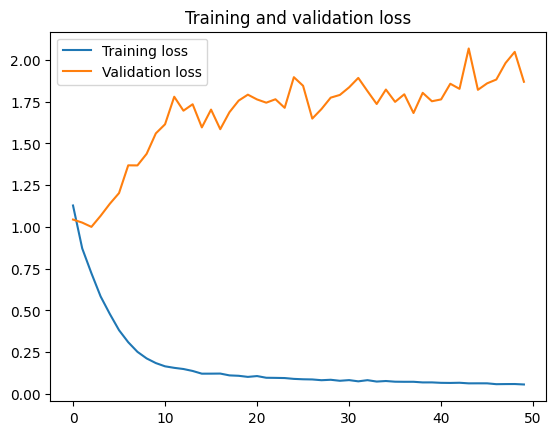

313/313 [==============================] - 2s 4ms/step - loss: 2.0398 - accuracy: 0.6343
Accuracy for test data :  0.6342999935150146
Loss for test data :  2.0397679805755615


(2.0397679805755615, 0.6342999935150146)

In [48]:
run_model(model_work, 50)

157/157 [==============================] - 1s 4ms/step


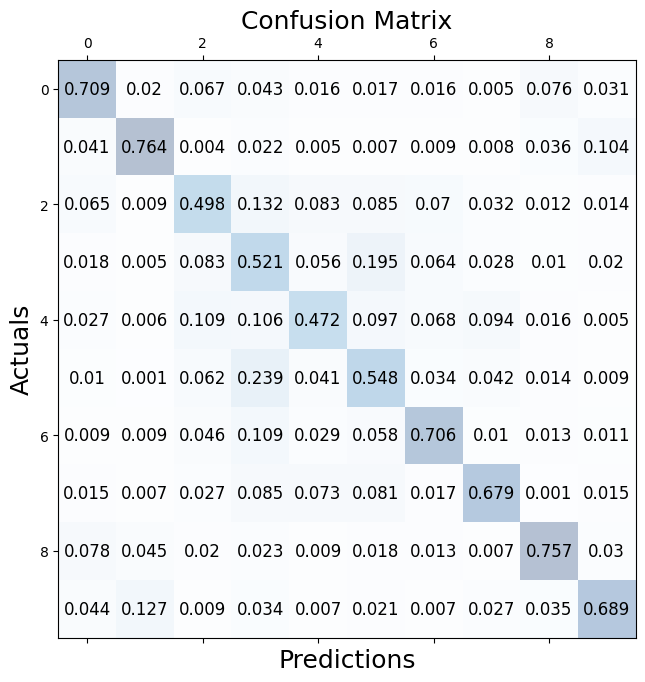

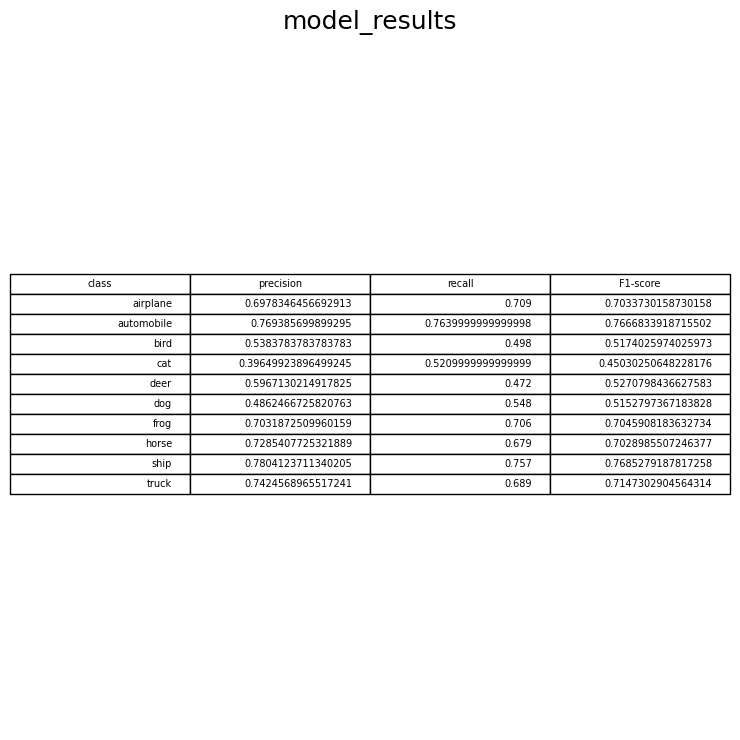

In [49]:
result_model(model_work)

## Уменьшенный датасет

In [50]:
small_model_work = ModelVisualization(model, small_data)

Epoch 1/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0680 - accuracy: 0.9814 - val_loss: 0.0838 - val_accuracy: 0.9900
Epoch 2/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0879 - accuracy: 0.9708 - val_loss: 0.0809 - val_accuracy: 0.9600
Epoch 3/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0661 - accuracy: 0.9791 - val_loss: 0.1375 - val_accuracy: 0.9450
Epoch 4/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.1249 - val_accuracy: 0.9550
Epoch 5/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0634 - accuracy: 0.9796 - val_loss: 0.1298 - val_accuracy: 0.9350
Epoch 6/50
154/154 [==============================] - 2s 13ms/step - loss: 0.0635 - accuracy: 0.9802 - val_loss: 0.1672 - val_accuracy: 0.9400
Epoch 7/50
154/154 [==============================] - 2s 13ms/step - loss: 0.0600 - accuracy: 0.9807 - val_loss: 0.2144 - val_accuracy: 0.9050

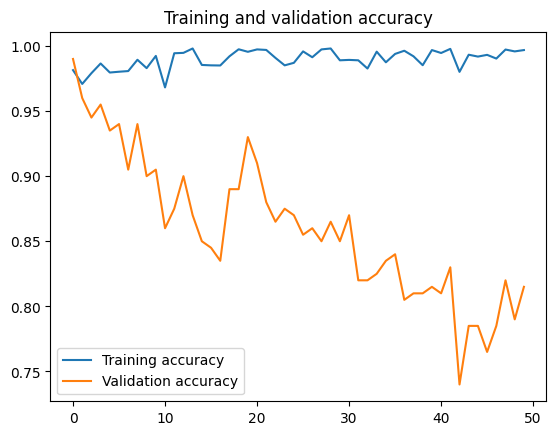

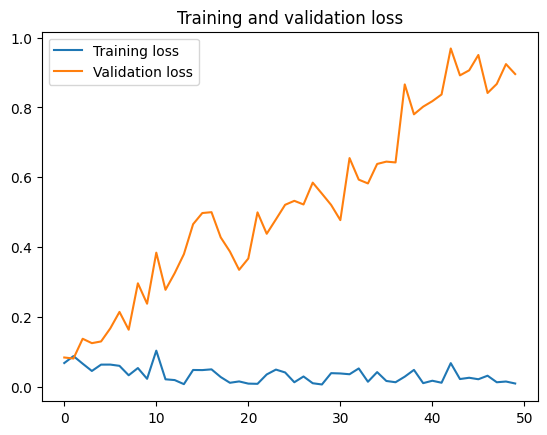

313/313 [==============================] - 1s 4ms/step - loss: 2.4077 - accuracy: 0.6212
Accuracy for test data :  0.6212000250816345
Loss for test data :  2.407701253890991


(2.407701253890991, 0.6212000250816345)

In [51]:
run_model(small_model_work, 50)

157/157 [==============================] - 1s 4ms/step


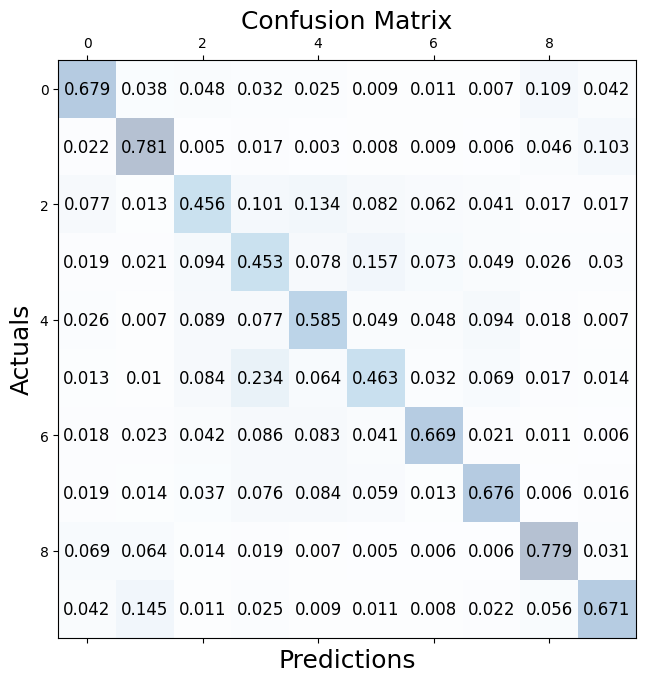

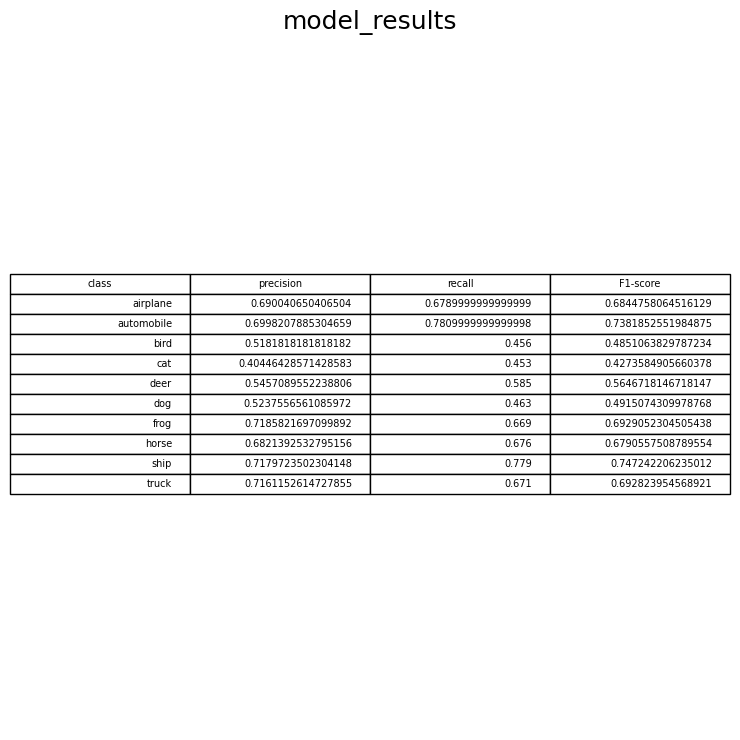

In [52]:
result_model(small_model_work)

## Аугментированный датасет

In [44]:
augmented_model_work = ModelVisualization(model, augmented_data)

Epoch 1/50
368/368 [==============================] - 31s 19ms/step - loss: 2.2227 - accuracy: 0.1881 - val_loss: 2.3408 - val_accuracy: 0.0976
Epoch 2/50
368/368 [==============================] - 6s 16ms/step - loss: 1.9500 - accuracy: 0.2847 - val_loss: 2.0761 - val_accuracy: 0.2743
Epoch 3/50
368/368 [==============================] - 6s 16ms/step - loss: 1.8275 - accuracy: 0.3364 - val_loss: 1.9694 - val_accuracy: 0.3105
Epoch 4/50
368/368 [==============================] - 6s 16ms/step - loss: 1.7121 - accuracy: 0.3736 - val_loss: 1.7927 - val_accuracy: 0.3650
Epoch 5/50
368/368 [==============================] - 6s 16ms/step - loss: 1.6795 - accuracy: 0.3878 - val_loss: 1.8261 - val_accuracy: 0.3718
Epoch 6/50
368/368 [==============================] - 6s 16ms/step - loss: 1.5696 - accuracy: 0.4349 - val_loss: 1.7502 - val_accuracy: 0.3855
Epoch 7/50
368/368 [==============================] - 6s 16ms/step - loss: 1.5306 - accuracy: 0.4491 - val_loss: 1.7404 - val_accuracy: 0.406

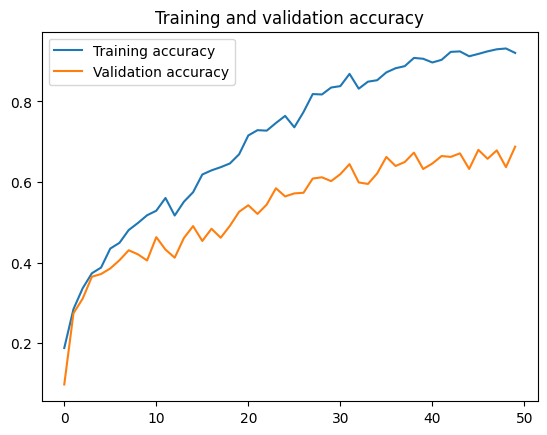

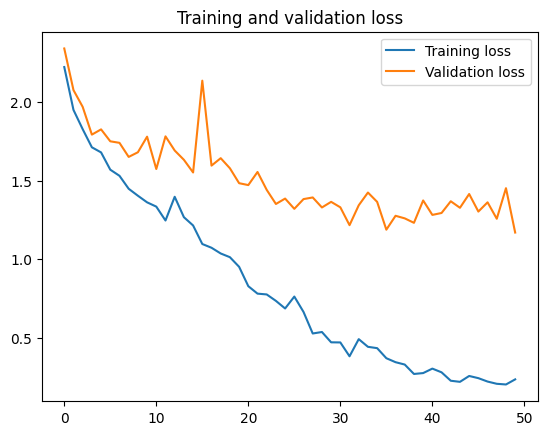

313/313 [==============================] - 2s 5ms/step - loss: 2.4502 - accuracy: 0.4834
Accuracy for test data :  0.48339998722076416
Loss for test data :  2.4501686096191406


(2.4501686096191406, 0.48339998722076416)

In [45]:
run_model(augmented_model_work, 50)

157/157 [==============================] - 1s 4ms/step


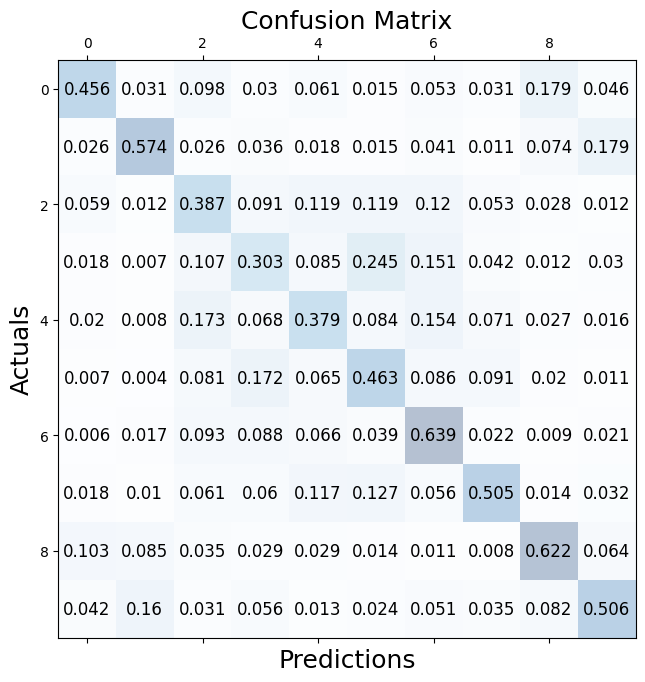

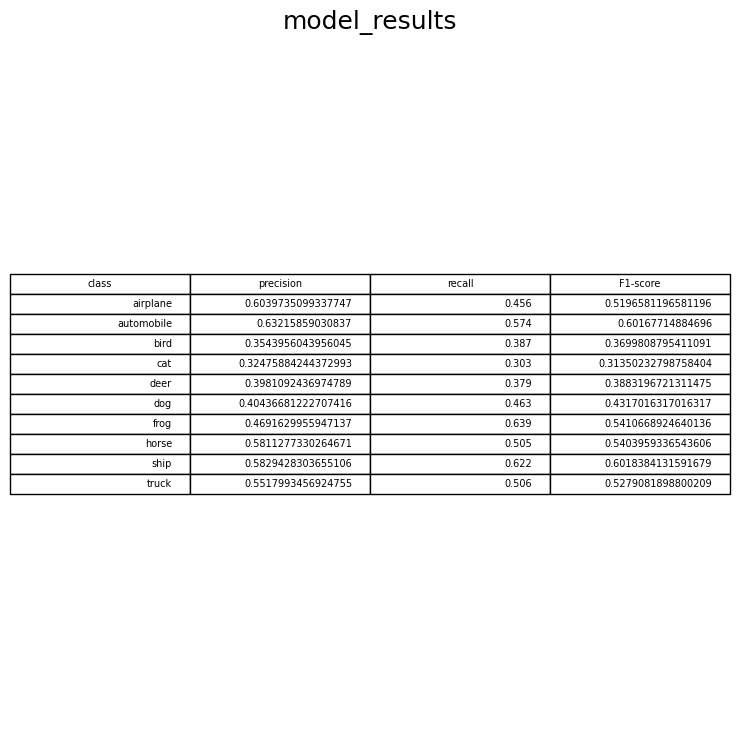

In [46]:
result_model(augmented_model_work)